In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
M=pd.read_excel('C:/Users/farou/Documents/AMG.xlsx')
M.head()
#C:/Users/farou/Pictures/Screenshots/STAT/M.xlsx

,Genre,age,A_E,MT_item1,MT_item2,MT_item3,For_item1,ITEM1,ITEM2,ITEM3,ITEM4
0,Homme,20,CI1,2,1,4,Option réfléchir,2,1,1,4
1,Homme,20,CI1,2,2,4,une bonne option,1,1,3,5
2,Femme,20,CI2,1,2,4,Option réfléchir,2,2,1,4
3,Femme,20,CI1,1,4,5,une bonne option,5,4,5,5
4,Homme,20,CI1,5,4,4,une bonne option,4,4,3,3


In [3]:
P=M[['ITEM1','ITEM2','ITEM3','ITEM4','For_item1']]

P['For_item1'].replace(["Option réfléchir","une bonne option","pas d'avis clair sur ce sujet","une option à éviter"],[1,2,3,4],inplace=True)
P.head()

C:\Users\farou\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ITEM1,ITEM2,ITEM3,ITEM4,For_item1
0,2,1,1,4,1
1,1,1,3,5,2
2,2,2,1,4,1
3,5,4,5,5,2
4,4,4,3,3,2


In [4]:
Y=P['For_item1']
X=P.drop('For_item1',axis=1)
X0=P.iloc[:,0]
X1=P.iloc[:,1]
X2=P.iloc[:,2]
X3=M.iloc[:,3]
X.head()

,ITEM1,ITEM2,ITEM3,ITEM4
0,2,1,1,4
1,1,1,3,5
2,2,2,1,4
3,5,4,5,5
4,4,4,3,3


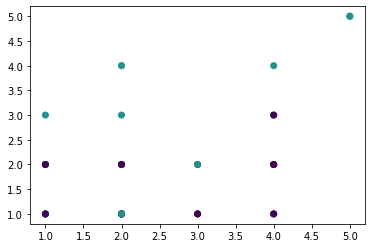

In [5]:
plt.scatter(X0,X2,c=Y)

In [6]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2)
print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (34, 4)
Test set : (9, 4)


Text(0.5, 1.0, 'Test set')

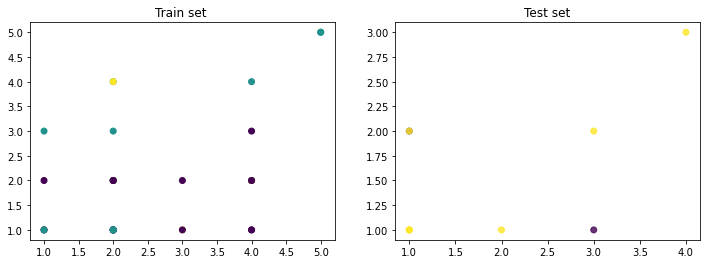

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(121)
X1=X_train.iloc[:,0]
X2=X_train.iloc[:,2]
Z1=X_test.iloc[:,0]
Z2=X_test.iloc[:,2]
plt.subplot(121)
plt.scatter(X1,X2,c=Y_train)
plt.title("Train set ")
plt.subplot(122)
plt.scatter(Z1,Z2,c=Y_test,alpha=0.8)
plt.title("Test set")

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
print('Test Score :',model.score(X_train,Y_train))

Test Score : 0.7058823529411765


In [19]:
def rep(model,ITEM1=2,ITEM2=1,ITEM3=4,ITEM4=1):
    x=np.array([ITEM1,ITEM2,ITEM3,ITEM4]).reshape(1,4)
    print(model.predict(x))


In [20]:
rep(model)

[1]
